In [748]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlopen

from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans as kmeans

from scipy.spatial.distance import euclidean as d2

# 1. k-NN Algorithm


## 1.1 First Example

In [145]:
def randomPoints(center,N,label):
    points = np.random.rand(N,2)
    points[:,0] = points[:,0] + center[0]
    points[:,1] = points[:,1] + center[1]
    labels = np.array([label for i in range(N)])
    return points,labels

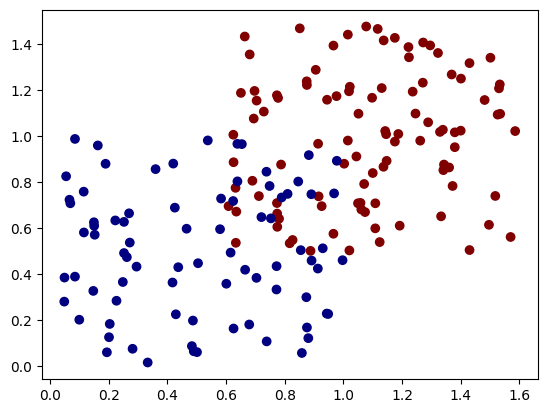

In [440]:
d1,l1 = randomPoints([0.6,0.5],100,1)
d2,l2 = randomPoints([0,0],80,0)
data = np.concatenate((d1,d2))
labels = np.concatenate((l1,l2))

plt.scatter(data[:,0],data[:,1],c=labels,cmap='jet')

In [478]:
X_train, X_test, y_train, y_test = train_test_split(data,labels,train_size=0.75)

model = knn(n_neighbors=1,metric='euclidean')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
cm = confusion_matrix(y_test,y_predict)
(cm[0,0]+cm[1,1])/len(y_test)

0.8444444444444444

## 1.2 Second Example


In [479]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [621]:
X = data.iloc[:,1:13]
y = data.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

model = knn(n_neighbors=5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

confusion_matrix(y_test,y_predict)

array([[14,  2,  0],
       [ 3, 14,  0],
       [ 0,  0, 12]])

## 1.3 Third Example


In [622]:
with urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/00602/DryBeanDataset.zip') as url:
    zf = ZipFile(BytesIO(url.read()))
    data = pd.read_excel(zf.open('DryBeanDataset/Dry_Bean_Dataset.xlsx'))
    
data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [623]:
X = data.iloc[:,0:16]
y = data.iloc[:,16]
np.unique(y)

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [624]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

model = knn(n_neighbors=3)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

confusion_matrix(y_test,y_predict)

array([[171,   0, 115,   0,  34,   0,  15],
       [  0, 110,   2,   0,   0,   0,   0],
       [135,   0, 249,   0,  21,   1,   1],
       [  0,   0,   0, 773,   5,  45,  56],
       [ 38,   0,  22,  15, 327,   1,  71],
       [  1,   0,   0,  92,   5, 320,  84],
       [ 10,   0,   5,  94,  51,  45, 489]])

In [626]:
encoder = OneHotEncoder()
ynew = encoder.fit_transform(np.array(y).reshape(-1, 1)).toarray()
ynew.shape

(13611, 7)

In [141]:
ynew[:,0]

array([0., 0., 0., ..., 0., 0., 0.])

In [707]:
X_train,X_test,y_train,y_test = train_test_split(X,ynew[:,4],test_size=0.25)

model = knn(n_neighbors=5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

confusion_matrix(y_test,y_predict)

array([[2812,  102],
       [ 180,  309]])

# 2. k-means

## 2.1 First Example

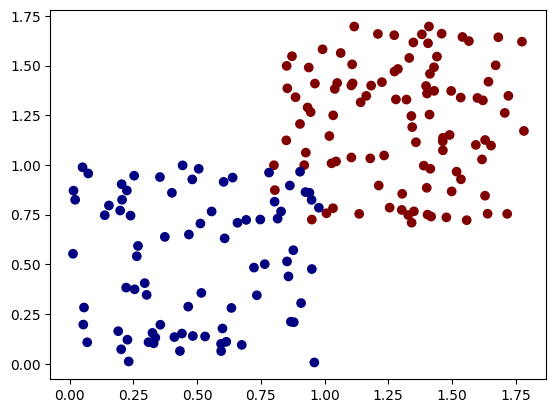

In [708]:
d1,l1 = randomPoints([0.8,0.7],100,1)
d2,l2 = randomPoints([0,0],80,0)
data = np.concatenate((d1,d2))
labels = np.concatenate((l1,l2))

plt.scatter(data[:,0],data[:,1],c=labels,cmap='jet')

In [709]:
model = kmeans(n_clusters=2)
model.fit(data)

KMeans(n_clusters=2)

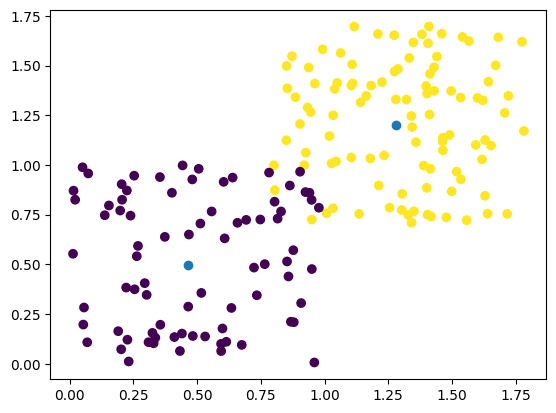

In [710]:
plt.scatter(data[:,0],data[:,1],c=labels)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])

In [167]:
y_predict = model.predict(data)
confusion_matrix(labels,y_predict)

array([[79,  1],
       [ 3, 97]])

## 2.2 Second Example

In [715]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header=None)
data

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [729]:
X = data.iloc[:,1:8]
y = data.iloc[:,0]

model = kmeans(n_clusters=2)
model.fit(X)
y_predict = model.predict(X)

tb = pd.crosstab(y,y_predict)
tb/tb.sum(axis=0)

col_0,0,1
0,,
F,0.194395,0.451011
I,0.548043,0.057024
M,0.257562,0.491965


## 2.3 Third Example

In [739]:
data = pd.read_csv('./data/Hospitals_within_25_Miles_of_Vermont.csv')
data

,X,Y,FID,NAME,ADDRESS,CITY,ST_ABREV,ZIP_CODE,TYPE,PHONE
0,-7.957676e+06,5.605486e+06,1,Upper Connecticut Vly Hospital,181 Corliss Lane,Colebrook,NH,03576-9533,Critical Access,603-237-4971
1,-8.045522e+06,5.415291e+06,2,Dartmouth-Hitchcock Med Ctr,1 Medical Center Drive,Lebanon,NH,03756-0001,Level 1 Trauma,603-650-5000
2,-8.017601e+06,5.486404e+06,3,Cottage Hospital,Swiftwater Road,Woodsville,NH,03785-2001,Critical Access,603-747-9000
3,-8.192821e+06,5.498808e+06,4,Elizabethtown Comm Hospital,75 Park Street,Elizabethtown,NY,12932-0277,Critical Access,518-873-6377
4,-8.089348e+06,5.319404e+06,5,Grace Cottage Hospital,185 Grafton Road,Townsend,VT,05353-0216,Critical Access,802-365-7676
5,-8.134456e+06,5.591137e+06,6,Northwestern Medical Center,133 Fairfield Street,Saint Albans,VT,05478-1734,Hospital,802-524-5911
6,-8.077451e+06,5.499588e+06,7,Central Vermont Medical Center,130 Fisher Road,Berlin,VT,05602,Hospital,802-371-4100
7,-8.016067e+06,5.534598e+06,8,Northeastern Vermont Reg Hosp,1315 Hospital Drive,Saint Johnsbury,VT,05819-9962,Critical Access,802-748-8141
8,-8.153683e+06,5.231186e+06,9,Berkshire Medical Center,725 North Street,Pittsfield,MA,01201-4124,Hospital,413-447-2000
9,-8.138391e+06,5.267314e+06,10,North Adams Regional Hospital,71 Hospital Avenue,North Adams,MA,01247-2584,Hospital,413-664-5000


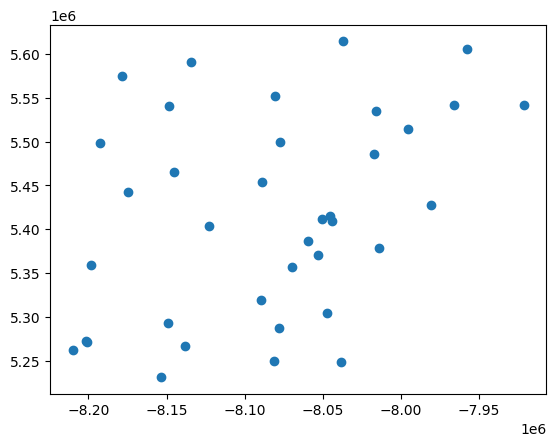

In [740]:
plt.scatter(data['X'],data['Y'])

In [741]:
model = kmeans(n_clusters=4)
model.fit(data[['X','Y']])

KMeans(n_clusters=4)

In [742]:
centers = model.cluster_centers_
centers

array([[-8053058.85903   ,  5401429.31326   ],
       [-8132149.61478333,  5280675.16489167],
       [-8141537.012     ,  5520405.437875  ],
       [-7987410.70231429,  5548292.60391429]])

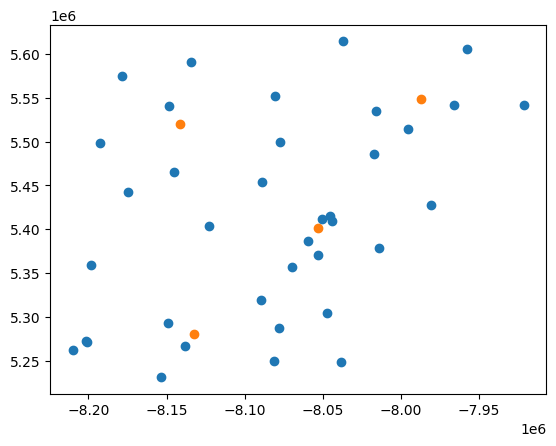

In [743]:
plt.scatter(data['X'],data['Y'])
plt.scatter(centers[:,0],centers[:,1])

In [744]:
labels = model.fit_predict(data[['X','Y']])
labels

array([1, 2, 1, 3, 0, 3, 3, 1, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 2, 2, 0, 0,
       0, 0, 3, 3, 2, 2, 2, 2, 0, 0, 3, 3, 2, 3, 1], dtype=int32)

In [745]:
def fitFunction(points,labels,centers):
    plt.scatter(points[:,0],points[:,1])
    plt.scatter(centers[:,0],centers[:,1])
    k = centers.shape[0]
    return max([d2(points[i,:],centers[i,:]) for i in range(k)])

144721.9918187225

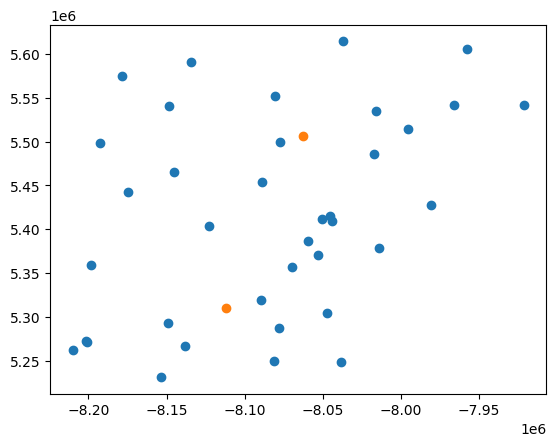

In [756]:
model = kmeans(n_clusters=2)
labels = model.fit_transform(data[['X','Y']])
centers = model.cluster_centers_

fitFunction(np.array(data[['X','Y']]),labels,centers)

344499.5210149432

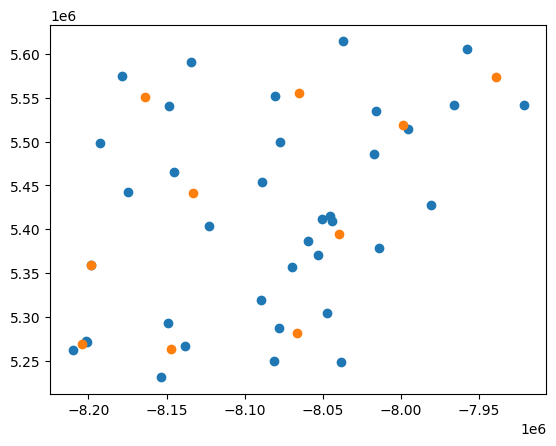

In [810]:
model = kmeans(n_clusters=10)
labels = model.fit_transform(data[['X','Y']])
centers = model.cluster_centers_

fitFunction(np.array(data[['X','Y']]),labels,centers)